In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 한글 처리하는 코드
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 대표 통계량 함수

In [ ]:
# 절사 평균
- 매우 크거나 매우 작은 값에 의한 영향을 줄이기 위해 고안됨
데이터 범위에 속한 데이터에 대해서만 평균을 낸 것

In [5]:
income = np.random.normal(2000000,500000,100)
income[:3]

array([2449283.35413906, 2557129.53343321, 1494379.68894878])

In [4]:
income = np.append(income, 10**9)
print(np.mean(income)) # 100명의 소득이 200만원에 가까운데 한명 때문에 1200만원으로 평균이 됨

11871578.164292865


In [16]:
trim_mean(income, 0.2) #[20%~80%]

1991362.652023637

In [8]:
# 최빈값 계산
x = np.random.choice(['A','B','C'],1000)
x[:5]
len(x)

1000

In [15]:
mode(x) # [0] 최빈값, [1] 빈도수

ModeResult(mode=array(['B'], dtype='<U1'), count=array([341]))

In [13]:
pd.Series(x).value_counts().index[0]

'B'

# 산포 통계량 함수

## 분산

In [18]:
x= [1,2,3,4,5]
print(np.var(x,ddof=1))# 분모 n-1 : ddof 값에 따라서 분모에서 1을 뺄건지 결정
print(np.array(x).var()) # 분모 n
print(pd.Series(x).var(ddof=0)) # 분모 n

# ddof(자유도)는 값을 1로 두고 사용함
# sample 데이터는 분모를 n-1로 두고 계산함
# 취득하는 데이터는 sample일 수 밖에 없다
# 값의 스케일에 크게 영향을 받는 통계량이므로 변수를 스케일링 한 후 분산, 표준편차를 구함

2.5
2.0
2.0


## 표준편차

In [19]:
x= [1,2,3,4,5]
print(np.std(x,ddof=1))# 분모 n-1 : ddof 값에 따라서 분모에서 1을 뺄건지 결정
print(np.array(x).std()) # 분모 n
print(pd.Series(x).std(ddof=1)) # 분모 n-1

1.5811388300841898
1.4142135623730951
1.5811388300841898


## 변동계수
- 변수를 스케일링 한 후 표준편차를 구함(데이터가 모두 양수인 경우 변동계수 사용)

In [21]:
x1 = np.array([1,2,3,4,5])
x2 = x1*10

In [22]:
print(np.std(x1,ddof=1))
print(np.std(x2,ddof=1))
# 표준편차의 차이가 10배가 남

1.5811388300841898
15.811388300841896


In [24]:
print(variation(x1))
print(variation(x2))
# 둘의 산포가 똑같다는 것을 의미

0.47140452079103173
0.4714045207910317


## 스케일링

In [25]:
x1,x2

(array([1, 2, 3, 4, 5]), array([10, 20, 30, 40, 50]))

In [28]:
# standard scaling
z1=(x1-x1.mean())/x1.std()
z2=(x2-x2.mean())/x2.std()
z1, z2
# 결국 둘의 데이터는 똑같은 대표값을 가지게 됨, 단위만 다를뿐!

(array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356]),
 array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356]))

In [31]:
# sklearn을 잉ㅅㅇ한 스케일링 - 머신러닝을 위해서 쓰는 경우가 대부분
x = pd.DataFrame({'X1':[1,2,3,4,5],
                 'X2':[10,20,30,40,50]})
x

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [36]:
Z = scaler.fit_transform(x)
pd.DataFrame(Z)

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## 범위와 사분위 계산

In [39]:
x = np.random.normal(100,20,size=1000)

# 최대치와 최소치의 범위값
print(np.max(x)-np.min(x))
print(np.ptp(x))

132.28979840447192
132.28979840447192


In [41]:
# 사분위
print(np.quantile(x,0.75)-np.quantile(x,0.25))
print(iqr(x))

28.748791768350287
28.748791768350287


# 분포통계량 함수

In [45]:
x=np.arange(1,12,1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [44]:
print(np.percentile(x,10))
print(np.quantile(x,0.1))

2.0
2.0


## 왜도 계산
- 분포의 비대칭도
- 왜도가 0이면 정규부포
- 왜도의 절대값이 1.5 이상이면 많이 치우친 데이터

In [46]:
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

<AxesSubplot:>

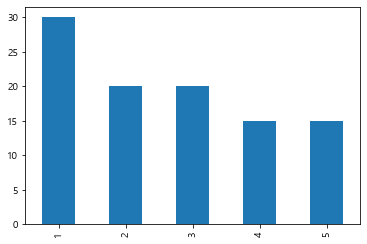

In [52]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

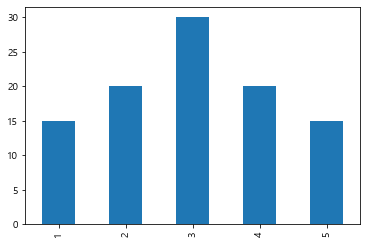

In [53]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

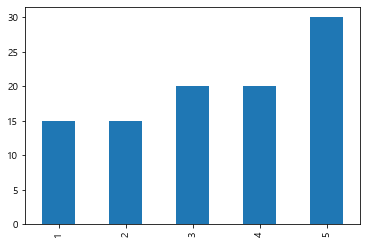

In [54]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

In [55]:
print('좌로 치우쳤을 때 왜도 : ', skew(x1))
print('치우치지 않았을 때 : ', skew(x2))
print('우로 치우쳤을 때 왜도 : ', skew(x3))

좌로 치우쳤을 때 왜도 :  0.3192801008486361
치우치지 않았을 때 :  0.0
우로 치우쳤을 때 왜도 :  -0.31928010084863606


## 첨도 계산

In [56]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

<AxesSubplot:>

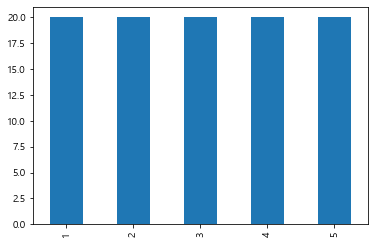

In [60]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

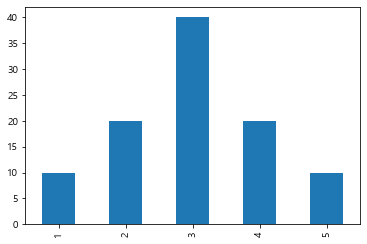

In [58]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

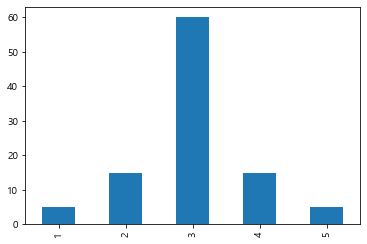

In [59]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

In [61]:
print('전혀 뾰족하지 않을 때 첨도 : ', kurtosis(x1))
print('조금 뾰족할 때 첨도 : ', kurtosis(x2))
print('매우 뾰족할 때 첨도 : ', kurtosis(x3))

전혀 뾰족하지 않을 때 첨도 :  -1.3
조금 뾰족할 때 첨도 :  -0.5
매우 뾰족할 때 첨도 :  0.8775510204081636
